In [1]:
#modul de carrega i de neteja de les dades, comú des de la primera pràctica

%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.preprocessing import OrdinalEncoder
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

#per realitzar les grafiques de regrassió ha estat necessari ampliar els chunks k

plt.rcParams["agg.path.chunksize"]=10000

#carreguem els 3 camps en un de sol per poder utilitzar-el als analisi
df = pd.read_csv("DelayedFlights.csv", parse_dates= {"Data" : ["Year","Month","DayofMonth"]})

#en la pràctica inicial es demanar carregar sols uns columnes en concret per poder analitzar, en base comentaris
#carrego totes les columnes
#df=DelayFligths_df[["Data","DayOfWeek","UniqueCarrier","Origin","Dest","AirTime","Distance","ArrDelay","DepDelay","DepTime","ArrTime","CancellationCode"]]

#millorat el procés de neteja / analisi de la qualitat en les dades
missing_df = df.isnull().sum(axis=0).reset_index()
missing_df.columns = ['variable', 'missing values']
missing_df['filling factor (%)']=(df.shape[0]-missing_df['missing values'])/df.shape[0]*100
missing_df.sort_values('filling factor (%)').reset_index(drop = True)

print (missing_df.describe)


df["ArrDelay"] = df['ArrDelay'].fillna(df['ArrDelay'].mean())

df["DepDelay"] = df['DepDelay'].fillna(df['DepDelay'].mean())

df["AirTime"] = df['AirTime'].fillna(df['AirTime'].mean())
df["Distance"] = df['Distance'].fillna(df['Distance'].mean())


missing_df = df.isnull().sum(axis=0).reset_index()
missing_df.columns = ['variable', 'missing values']
missing_df['filling factor (%)']=(df.shape[0]-missing_df['missing values'])/df.shape[0]*100
missing_df.sort_values('filling factor (%)').reset_index(drop = True)

#veiem que han resolt els nulls de les columnes ArrDelay, DepDelay, AirTime i Distance
print (missing_df.describe)

df.dropna(inplace = True)

#esborren totes les files que segueixin contenint algun null, tot i la perdua dinformació
missing_df = df.isnull().sum(axis=0).reset_index()
missing_df.columns = ['variable', 'missing values']
missing_df['filling factor (%)']=(df.shape[0]-missing_df['missing values'])/df.shape[0]*100
missing_df.sort_values('filling factor (%)').reset_index(drop = True)



print (missing_df.describe)


# transform categorical to continuous
factorizables_mapping = {}
factorizable_names = ['UniqueCarrier', 'Origin', 'Dest']
for fact_name in factorizable_names:
    df[fact_name], factorizables_mapping[fact_name] = pd.factorize(df[fact_name])
corrMatrix = df.corr()
print (corrMatrix)

# les variables més correlacionades són Distance - ActualElapsedTime, Distance - CRSElapsedTime, Distance - AirTime 


<bound method NDFrame.describe of              variable  missing values  filling factor (%)
0                Data               0          100.000000
1          Unnamed: 0               0          100.000000
2           DayOfWeek               0          100.000000
3             DepTime               0          100.000000
4          CRSDepTime               0          100.000000
5             ArrTime            7110           99.632892
6          CRSArrTime               0          100.000000
7       UniqueCarrier               0          100.000000
8           FlightNum               0          100.000000
9             TailNum               5           99.999742
10  ActualElapsedTime            8387           99.566957
11     CRSElapsedTime             198           99.989777
12            AirTime            8387           99.566957
13           ArrDelay            8387           99.566957
14           DepDelay               0          100.000000
15             Origin               0 

In [2]:
#bloc per transformar les dades descriptives en valors numerics
# i ajustar les escales

msk = np.random.rand(len(df)) < 0.8

train = df[msk]

test = df[~msk]



#transformo les dades origen i destí
origin_cod = df[['Origin']]
desti_cod = df[['Dest']]


ordinal_encoder = OrdinalEncoder()
df["origin_enc"] = ordinal_encoder.fit_transform(origin_cod)

ordinal_encoder = OrdinalEncoder()
desti_cod_encoded = ordinal_encoder.fit_transform(desti_cod)
df["desti_enc"] = ordinal_encoder.fit_transform(desti_cod)
print(desti_cod_encoded[:10])

#escalo els valors de temps arribada i temps de soritda perquè quedin els valors entorn de 0 


min_max_scaler = MinMaxScaler()
deptime_values = df[['DepTime']]
scaled_values = min_max_scaler.fit(deptime_values)
df["deptime_esc"]=min_max_scaler.transform(deptime_values)

min_max_scaler = MinMaxScaler()
arrtime_values = df[['ArrTime']]
scaled_values = min_max_scaler.fit(arrtime_values)
#df["arrtime_esc"]=min_max_scaler.transform(arrtime_values)


Min_max_scaler=MinMaxScaler (feature_range= (0, 1))
X_after_min_max_scaler=min_max_scaler.fit_transform(df[['AirTime']])

df["arrtime_esc"]=min_max_scaler.transform(X_after_min_max_scaler)

pd.get_dummies(df, columns=["CancellationCode"])




[[0.]
 [1.]
 [2.]
 [3.]
 [4.]
 [0.]
 [0.]
 [5.]
 [2.]
 [6.]]


,Data,Unnamed: 0,DayOfWeek,DepTime,CRSDepTime,ArrTime,CRSArrTime,UniqueCarrier,FlightNum,TailNum,...,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay,origin_enc,desti_enc,deptime_esc,arrtime_esc,CancellationCode_N
3,2008-01-03,4,4,1829.0,1755,1959.0,1925,0,3920,N464WN,...,2.0,0.0,0.0,0.0,32.0,0.0,0.0,0.761984,0.000065,1
5,2008-01-03,6,4,1937.0,1830,2037.0,1940,0,509,N763SW,...,10.0,0.0,0.0,0.0,47.0,0.0,1.0,0.807003,0.000193,1
7,2008-01-03,11,4,1644.0,1510,1845.0,1725,0,1333,N334SW,...,8.0,0.0,0.0,0.0,72.0,0.0,2.0,0.684869,0.000090,1
9,2008-01-03,16,4,1452.0,1425,1640.0,1625,0,675,N286WN,...,3.0,0.0,0.0,0.0,12.0,0.0,3.0,0.604835,0.000179,1
11,2008-01-03,18,4,1323.0,1255,1526.0,1510,0,4,N674AA,...,0.0,0.0,0.0,0.0,16.0,0.0,4.0,0.551063,0.000092,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1936751,2008-12-13,7009705,6,921.0,830,1112.0,1008,7,1616,N907DE,...,51.0,0.0,13.0,0.0,0.0,98.0,7.0,0.383493,0.000069,1
1936752,2008-12-13,7009709,6,1552.0,1520,1735.0,1718,7,1620,N905DE,...,0.0,0.0,0.0,0.0,17.0,110.0,84.0,0.646519,0.000023,1
1936753,2008-12-13,7009710,6,1250.0,1220,1617.0,1552,7,1621,N938DL,...,3.0,0.0,0.0,0.0,22.0,81.0,84.0,0.520634,0.000101,1
1936754,2008-12-13,7009717,6,657.0,600,904.0,749,7,1631,N3743H,...,0.0,57.0,18.0,0.0,0.0,86.0,84.0,0.273447,0.000066,1


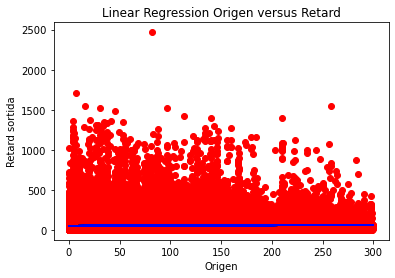

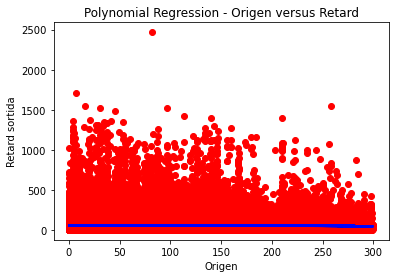

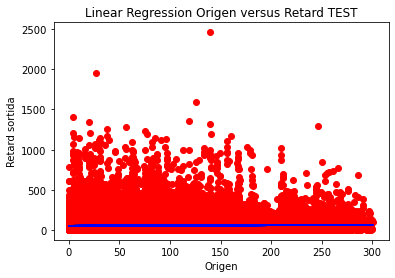

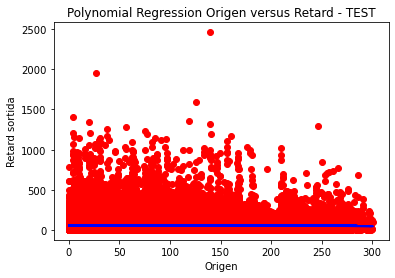

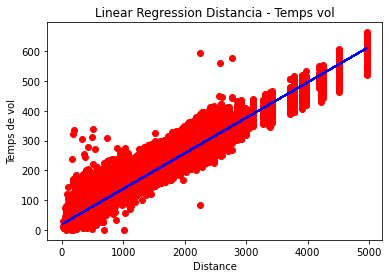

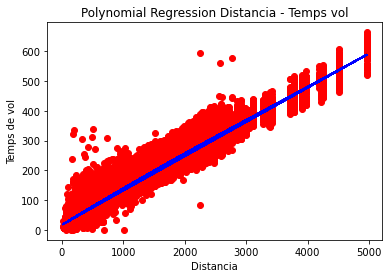

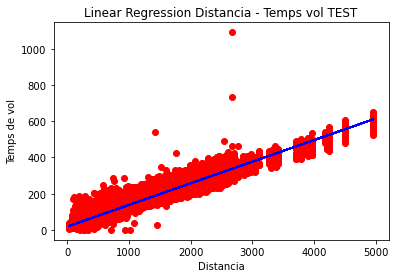

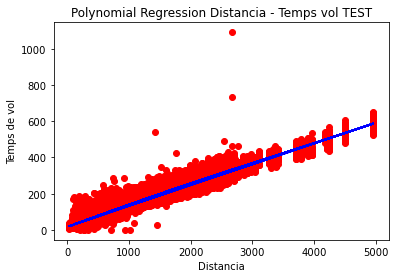

In [3]:
#generarem el subconjunt train i test

msk = np.random.rand(len(df)) < 0.8

train = df[msk]

test = df[~msk]

#relació entre el retras de la sortida i des on surt (passat a numeric
X_train = train["origin_enc"].values

y_train = train["DepDelay"].values


X_test = test["origin_enc"].values

y_test = test["DepDelay"].values


df_x = pd.DataFrame(np.c_[df['origin_enc']], columns = ['origin_enc'])
#Y axis = Our dependent variable or t_enche income of adult i.e Income
df_y = pd.DataFrame(df.DepDelay)

x_train, x_test, y_train, y_test = train_test_split(df_x, df_y, test_size=0.33, random_state=42)

#analisis Regressió lineal de les dades train
lin_reg = LinearRegression()
lin_reg.fit(x_train, y_train)

#analisi regressió polinomica
from sklearn.preprocessing import PolynomialFeatures
poly_reg =  PolynomialFeatures(degree = 4)
X_poly = poly_reg.fit_transform(x_train)
lin_reg_2 = LinearRegression()
lin_reg_2.fit(X_poly, y_train)


#impressió regressió lineal
plt.scatter(x_train , y_train, color = 'red')
plt.plot(x_train , lin_reg.predict(x_train), color = 'blue')
plt.title("Linear Regression Origen versus Retard")
plt.xlabel("Origen")
plt.ylabel("Retard sortida")
plt.show()


#impressió regressió polinomica
plt.scatter(x_train , y_train, color = 'red')
plt.plot(x_train , lin_reg_2.predict( poly_reg.fit_transform(x_train)), color = 'blue')
plt.title("Polynomial Regression - Origen versus Retard")
plt.xlabel("Origen")
plt.ylabel("Retard sortida")
plt.show()



#analisis dades test
lin_reg = LinearRegression()
lin_reg.fit(x_test, y_test)

poly_reg =  PolynomialFeatures(degree = 4)
X_poly = poly_reg.fit_transform(x_test)
lin_reg_2 = LinearRegression()
lin_reg_2.fit(X_poly, y_test)


plt.scatter(x_test , y_test, color = 'red')
plt.plot(x_test , lin_reg.predict(x_test), color = 'blue')
plt.title("Linear Regression Origen versus Retard TEST")
plt.xlabel("Origen")
plt.ylabel("Retard sortida")
plt.show()



plt.scatter(x_test , y_test, color = 'red')
plt.plot(x_test , lin_reg_2.predict( poly_reg.fit_transform(x_test)), color = 'blue')
plt.title("Polynomial Regression Origen versus Retard - TEST")
plt.xlabel("Origen")
plt.ylabel("Retard sortida")
plt.show()

# EL RESULTAT DAQUEST EXERCICI VEIEM QUE HI HA POCA realació entre ORIGEN i retard darribada

#per poder comprar el resultats estudiaré les variables AirTime i Distance
#que per definició han destar correlacionades
df2_x = pd.DataFrame(np.c_[df['Distance']], columns = ['Distance'])
#Y axis = Our dependent variable or the income of adult i.e Income
df2_y = pd.DataFrame(df.AirTime)

x2_train, x2_test, y2_train, y2_test = train_test_split(df2_x, df2_y, test_size=0.33, random_state=42)

#analisis dades train
lin2_reg = LinearRegression()
lin2_reg.fit(x2_train, y2_train)

poly2_reg =  PolynomialFeatures(degree = 4)
X2_poly = poly2_reg.fit_transform(x2_train)
lin2_reg_2 = LinearRegression()
lin2_reg_2.fit(X2_poly, y2_train)


plt.scatter(x2_train , y2_train, color = 'red')
plt.plot(x2_train , lin2_reg.predict(x2_train), color = 'blue')
plt.title("Linear Regression Distancia - Temps vol")
plt.xlabel("Distance")
plt.ylabel("Temps de vol")
plt.show()



plt.scatter(x2_train , y2_train, color = 'red')
plt.plot(x2_train , lin2_reg_2.predict( poly2_reg.fit_transform(x2_train)), color = 'blue')
plt.title("Polynomial Regression Distancia - Temps vol")
plt.xlabel("Distancia")
plt.ylabel("Temps de vol")
plt.show()



#analisis dades test
lin2_reg = LinearRegression()
lin2_reg.fit(x2_test, y2_test)

poly2_reg =  PolynomialFeatures(degree = 4)
X2_poly = poly2_reg.fit_transform(x2_test)
lin2_reg_2 = LinearRegression()
lin2_reg_2.fit(X2_poly, y2_test)


plt.scatter(x2_test , y2_test, color = 'red')
plt.plot(x2_test , lin2_reg.predict(x2_test), color = 'blue')
plt.title("Linear Regression Distancia - Temps vol TEST")
plt.xlabel("Distancia")
plt.ylabel("Temps de vol")
plt.show()



plt.scatter(x2_test , y2_test, color = 'red')
plt.plot(x2_test , lin2_reg_2.predict( poly2_reg.fit_transform(x2_test)), color = 'blue')
plt.title("Polynomial Regression Distancia - Temps vol TEST")
plt.xlabel("Distancia")
plt.ylabel("Temps de vol")
plt.show()


In [4]:
############################ EXERCICI 1###################################################
#1. regressió lineal, es calcula la relació entre la variable Arrdelay depenent de origen del vol 
#no hi ha correlació entre origen i retard arribada, busquem altres variables

#per poder comprar el resultats estudiaré les variables AirTime i Distance
#que per definició han destar correlacionades
df2_x = pd.DataFrame(np.c_[df['Distance']], columns = ['Distance'])
#Y axis = Our dependent variable or the income of adult i.e Income
df2_y = pd.DataFrame(df.AirTime)

x2_train, x2_test, y2_train, y2_test = train_test_split(df2_x, df2_y, test_size=0.33, random_state=42)


lin_reg = LinearRegression()
lin_reg.fit(x2_train, y2_train)

# els coeficients que permetran estimar noves dates
print ('Coeficient regressió lineal: ', lin_reg.coef_)
print ('Intercepció regressió lineal: ',lin_reg.intercept_)



#2. multiple regressió, ArrDelay respecte aeroport origen i del desti

m_regr = LinearRegression()
x = np.asanyarray(df[['Distance','ActualElapsedTime']])
y = np.asanyarray(df[['AirTime']])
m_regr.fit (x, y)
# El coefficients
print ('Coeficients regressió lineal múltiple: ', m_regr.coef_)



#3.analisi regressió polinomica
from sklearn.preprocessing import PolynomialFeatures
poly_reg =  PolynomialFeatures(degree = 4)
X_poly = poly_reg.fit_transform(x2_train)
lin_reg_2 = LinearRegression()
lin_reg_2.fit(X_poly, y2_train)


#coeficiens 
print ('Coeficients regressió polinomica: ', lin_reg_2.coef_)
print ('Intercepcció regresió polinomica: ',lin_reg_2.intercept_)




from sklearn.tree import DecisionTreeRegressor
#DecisionTreeRegressor class has many parameters. Input only #random_state=0 or 42.
regressor = DecisionTreeRegressor(random_state=0)
#Fit the regressor object to the dataset.
regressor.fit(x2_train,y2_train)
score = regressor.score(x2_test, y2_test)

print ("Ajust abre de decisió:", score) 



Coeficient regressió lineal:  [[0.11925912]]
Intercepció regressió lineal:  [18.98155696]
Coeficients regressió lineal múltiple:  [[0.0711364  0.39401916]]
Coeficients regressió polinomica:  [[ 0.00000000e+00  1.25709648e-01 -2.37503464e-06 -3.63532764e-10
   8.46868235e-14]]
Intercepcció regresió polinomica:  [16.51602271]
Ajust abre de decisió: 0.9591221046868887


In [5]:
############################ EXERCICI 1###################################################
#que per definició han destar correlacionades
df2_x = pd.DataFrame(np.c_[df['origin_enc']], columns = ['origin_enc'])
#Y axis = Our dependent variable or the income of adult i.e Income
df2_y = pd.DataFrame(df.ArrDelay)

x2_train, x2_test, y2_train, y2_test = train_test_split(df2_x, df2_y, test_size=0.33, random_state=42)


lin_reg1 = LinearRegression()
lin_reg1.fit(x2_train, y2_train)

# els coeficients que permetran estimar noves dates
print ('Coeficient regressió lineal: ', lin_reg1.coef_)
print ('Intercepció regressió lineal: ',lin_reg1.intercept_)



#2. multiple regressió, ArrDelay respecte aeroport origen i del desti

m_regr1 = LinearRegression()
x = np.asanyarray(df[['origin_enc','desti_enc']])
y = np.asanyarray(df[['ArrDelay']])
m_regr1.fit (x, y)
# El coefficients
print ('Coeficients regressió lineal múltiple: ', m_regr1.coef_)



#3.analisi regressió polinomica
from sklearn.preprocessing import PolynomialFeatures
poly_reg =  PolynomialFeatures(degree = 4)
X_poly = poly_reg.fit_transform(x2_train)
lin_reg1_2 = LinearRegression()
lin_reg1_2.fit(X_poly, y2_train)


#coeficiens 
print ('Coeficients regressió polinomica: ', lin_reg1_2.coef_)
print ('Intercepcció regresió polinomica: ',lin_reg1_2.intercept_)




from sklearn.tree import DecisionTreeRegressor
#DecisionTreeRegressor class has many parameters. Input only #random_state=0 or 42.
regressor = DecisionTreeRegressor(random_state=0)
#Fit the regressor object to the dataset.
regressor.fit(x2_train,y2_train)
score1 = regressor.score(x2_test, y2_test)

print ("Ajust abre de decisió:", score1) 



Coeficient regressió lineal:  [[0.06087693]]
Intercepció regressió lineal:  [59.20275646]
Coeficients regressió lineal múltiple:  [[0.05279379 0.04059743]]
Coeficients regressió polinomica:  [[ 0.00000000e+00  2.44046933e-02  3.81772559e-05  4.04280397e-06
  -1.56594538e-08]]
Intercepcció regresió polinomica:  [60.06570451]
Ajust abre de decisió: 0.01659797369735938


In [7]:
#RESULTAT SOBRE VARIABLES CORRELACIONADES

# els coeficients que permetran estimar noves dates
print ('Coeficient regressió lineal: ', lin_reg.coef_)
print ('Intercepció regressió lineal: ',lin_reg.intercept_)

print ('Coeficients regressió lineal múltiple: ', m_regr.coef_)

#coeficiens 
print ('Coeficients regressió polinomica: ', lin_reg_2.coef_)
print ('Intercepcció regresió polinomica: ',lin_reg_2.intercept_)

print ("Ajust abre de decisió:", score) 
 

    #COMPARAR RESULTATS SOBRE VARIABLES NO CORRELACIONADES

# els coeficients que permetran estimar noves dates
print ('Coeficient regressió lineal VARIABLES NO CORRELACIONADES: ', lin_reg1.coef_)
print ('Intercepció regressió lineal VARIABLES NO CORRELACIONADES: ',lin_reg1.intercept_)

print ('Coeficients regressió lineal múltiple VARIABLES NO CORRELACIONADES: ', m_regr1.coef_)

#coeficiens 
print ('Coeficients regressió polinomica VARIABLES NO CORRELACIONADES: ', lin_reg1_2.coef_)
print ('Intercepcció regresió polinomica VARIABLES NO CORRELACIONADES: ',lin_reg1_2.intercept_)



print ("Ajust abre de decisió VARIABLES NO CORRELACIONADES:", score1) 


Coeficient regressió lineal:  [[0.11925912]]
Intercepció regressió lineal:  [18.98155696]
Coeficients regressió lineal múltiple:  [[0.0711364  0.39401916]]
Coeficients regressió polinomica:  [[ 0.00000000e+00  1.25709648e-01 -2.37503464e-06 -3.63532764e-10
   8.46868235e-14]]
Intercepcció regresió polinomica:  [16.51602271]
Ajust abre de decisió: 0.9591221046868887
Coeficient regressió lineal VARIABLES NO CORRELACIONADES:  [[0.06087693]]
Intercepció regressió lineal VARIABLES NO CORRELACIONADES:  [59.20275646]
Coeficients regressió lineal múltiple VARIABLES NO CORRELACIONADES:  [[0.05279379 0.04059743]]
Coeficients regressió polinomica VARIABLES NO CORRELACIONADES:  [[ 0.00000000e+00  2.44046933e-02  3.81772559e-05  4.04280397e-06
  -1.56594538e-08]]
Intercepcció regresió polinomica VARIABLES NO CORRELACIONADES:  [60.06570451]
Ajust abre de decisió VARIABLES NO CORRELACIONADES: 0.01659797369735938
